En este notebook, analizaré datos reales de una base de datos de India donde encuestan mujeres sobre la toma de anticonceptivos
El objetivo será la ** exploración de los datos, el razonamiento de la información, transformación de los datos y elaborar clasificadores con distintos modelos de ML, analizar la performance de los mismos, y su optimizacion**

Carga de librerias

In [ ]:
# Nummpy

import numpy as np

# Para dataframes
import pandas as pd

# Visualizaciones
import matplotlib.pyplot as plt1
import matplotlib as mpl
%matplotlib inline

import matplotlib.pylab as plt # Para gráficos

import seaborn as sns

# Para cargar archivos
from google.colab import files
import io

#scikit

from sklearn.linear_model import LogisticRegression # El método de regresión logística que vamos a usar

cargo archivo csv

In [ ]:
# Para cargar el archivo de datos, correr esta ventana
select_file = files.upload()

for fn in select_file.keys():
  nombre_de_archivo = "{name}".format(
      name=fn, length=len(select_file[fn]))

Saving anticoncepcion_indonesia_test LIMPIO.csv to anticoncepcion_indonesia_test LIMPIO.csv


In [ ]:
#Indico que voy a trabajar con el archivo seleccionado
df_test = pd.read_csv(io.BytesIO(select_file[nombre_de_archivo]))

In [ ]:
df_test

,Unnamed: 0,edad_mujer,educacion_mujer,educacion_hombre,numero_hijos,religion_mujer,mujer_trabaja,ocupacion_hombre,nivel_vida,exposicion_medios,Toma_anticonceptivos,trabajo_1,trabajo_2,trabajo_3,trabajo_4
0,0,30,2,3,1,1,1,2,1,0,0,0.0,1.0,0.0,0.0
1,1,31,3,4,0,1,0,2,3,0,0,0.0,1.0,0.0,0.0
2,2,23,1,2,3,1,1,3,2,1,0,0.0,0.0,1.0,0.0
3,3,46,1,2,3,1,1,2,1,1,0,0.0,1.0,0.0,0.0
4,4,36,4,4,3,1,1,1,4,0,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,1172,29,3,3,4,1,1,3,4,0,0,0.0,0.0,1.0,0.0
1173,1173,24,3,3,1,1,1,3,2,0,0,0.0,0.0,1.0,0.0
1174,1174,39,1,2,2,1,1,3,1,1,0,0.0,0.0,1.0,0.0
1175,1175,38,1,3,2,1,0,3,3,1,0,0.0,0.0,1.0,0.0


In [ ]:
#Indico que voy a trabajar con el archivo seleccionado
df = pd.read_csv(io.BytesIO(select_file[nombre_de_archivo]))

In [ ]:
#busco si hay nans
df.isnull().values.any()


False

In [ ]:
df

,edad_mujer,educacion_mujer,educacion_hombre,numero_hijos,religion_mujer,mujer_trabaja,ocupacion_hombre,nivel_vida,exposicion_medios,metodo_anticonceptivo
0,35,3,4,3,1,1,2,2,0,2
1,29,4,4,3,1,1,1,4,0,2
2,21,4,4,1,1,1,2,3,0,3
3,26,3,4,3,1,1,3,2,0,3
4,45,3,4,6,1,1,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...
291,29,2,3,1,1,1,1,1,0,1
292,38,4,4,5,1,1,2,3,0,3
293,47,4,4,8,1,1,1,4,0,2
294,44,3,4,2,1,1,1,4,1,1


In [ ]:
df['Toma_anticonceptivos'] = 0

indice =  df['metodo_anticonceptivo'] != 1  # indices de personas que toman anticonceptivos
df.loc[indice, 'Toma_anticonceptivos'] = 1 # entonces para esos valores del indice pongo 1

df.drop('metodo_anticonceptivo', inplace=True, axis=1)

In [ ]:
df

,edad_mujer,educacion_mujer,educacion_hombre,numero_hijos,religion_mujer,mujer_trabaja,ocupacion_hombre,nivel_vida,exposicion_medios,Toma_anticonceptivos
0,35,3,4,3,1,1,2,2,0,1
1,29,4,4,3,1,1,1,4,0,1
2,21,4,4,1,1,1,2,3,0,1
3,26,3,4,3,1,1,3,2,0,1
4,45,3,4,6,1,1,2,4,0,0
...,...,...,...,...,...,...,...,...,...,...
291,29,2,3,1,1,1,1,1,0,0
292,38,4,4,5,1,1,2,3,0,1
293,47,4,4,8,1,1,1,4,0,1
294,44,3,4,2,1,1,1,4,1,0


In [ ]:
# hot encoding

from sklearn.preprocessing import OneHotEncoder



encoder = OneHotEncoder(sparse=False) # armamos el encoder. sparse=False nos devuelve una matriz comun a la que estamos acostumbrados (en vez de esparsa)
direccion = np.array(df['ocupacion_hombre']).reshape(-1, 1) # aca pasamos a un vector la serie de pandas, como es usual
encoder.fit(direccion) # fiteo
print(encoder.categories_) # estas son las columnas binarias del nuevo encoding
direccion_hot = encoder.transform(direccion) # obtenemos la matriz binaria
print(direccion_hot)


[array([1, 2, 3, 4])]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
df2 = pd.DataFrame(direccion_hot)
df2.rename({0: 'trabajo_1', 1: 'trabajo_2', 2: 'trabajo_3', 3: 'trabajo_4'}, axis=1, inplace=True)

In [ ]:
df2

,trabajo_1,trabajo_2,trabajo_3,trabajo_4
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
291,1.0,0.0,0.0,0.0
292,0.0,1.0,0.0,0.0
293,1.0,0.0,0.0,0.0
294,1.0,0.0,0.0,0.0


In [ ]:
df1 = pd.concat([df, df2], axis=1)
df1

,edad_mujer,educacion_mujer,educacion_hombre,numero_hijos,religion_mujer,mujer_trabaja,ocupacion_hombre,nivel_vida,exposicion_medios,Toma_anticonceptivos,trabajo_1,trabajo_2,trabajo_3,trabajo_4
0,35,3,4,3,1,1,2,2,0,1,0.0,1.0,0.0,0.0
1,29,4,4,3,1,1,1,4,0,1,1.0,0.0,0.0,0.0
2,21,4,4,1,1,1,2,3,0,1,0.0,1.0,0.0,0.0
3,26,3,4,3,1,1,3,2,0,1,0.0,0.0,1.0,0.0
4,45,3,4,6,1,1,2,4,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,29,2,3,1,1,1,1,1,0,0,1.0,0.0,0.0,0.0
292,38,4,4,5,1,1,2,3,0,1,0.0,1.0,0.0,0.0
293,47,4,4,8,1,1,1,4,0,1,1.0,0.0,0.0,0.0
294,44,3,4,2,1,1,1,4,1,0,1.0,0.0,0.0,0.0


Seleccion de features

In [ ]:
print(df1. columns)

Index(['edad_mujer', 'educacion_mujer', 'educacion_hombre', 'numero_hijos',
       'religion_mujer', 'mujer_trabaja', 'ocupacion_hombre', 'nivel_vida',
       'exposicion_medios', 'Toma_anticonceptivos', 'trabajo_1', 'trabajo_2',
       'trabajo_3', 'trabajo_4'],
      dtype='object')


El AUC promedio es:
0.7191530691530691


Text(0, 0.5, 'Folds')

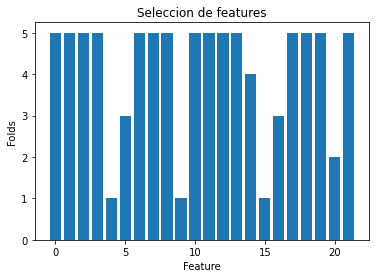

In [ ]:
# kbest

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Definamos la matriz X
campos = ['edad_mujer', 'educacion_mujer', 'educacion_hombre', 'numero_hijos', 'religion_mujer', 'mujer_trabaja', 'nivel_vida', 'exposicion_medios', 'trabajo_1', 'trabajo_2', 'trabajo_3'] # Lista que contiene las features de interés.
X = df1[campos].values # En este caso no hace falta reshapear, porque ya tiene la forma que queremos
y = np.array(df1['Toma_anticonceptivos']) # Nuestra etiqueta sigue siende la misma de antes
X = np.concatenate((X, X**2), axis=1) # agrego features elevados a potencias

Kbest = 18
 # los mejores K que voy a retener

skf = StratifiedKFold(n_splits=5, shuffle=True) # 5 folds es un número típico si tenemos suficientes datos. Pedimos shuffle=True para que sea al azar la separación en subgrupos
skf.get_n_splits(X, y) # arma los folds a partir de los datos

auc_values_fs =  []  # aca es donde van a ir a parar los indices de los features seleccionados en cada fold
selected_features= np.array([]).reshape(0,X.shape[1]) # aca es donde van a ir a parar los AUCs de cada fold. El reshape es para poder concatenar luego.


for train_index, test_index in skf.split(X, y): # va generando los indices que corresponden a train y test en cada fold
    X_train, X_test = X[train_index], X[test_index] # arma que es dato de entrenamiento y qué es dato de evaluación
    y_train, y_test = y[train_index], y[test_index]     # idem con los targets

    scaler = MinMaxScaler() # escaleo por separado ambos sets
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    scaler = MinMaxScaler() # escaleo por separado ambos sets
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)

    selector = SelectKBest(k=Kbest) # por defecto, usa el F score de ANOVA y los Kbest features
    selector.fit(X_train, y_train) # encuentro los F scores
    X_train_fs = selector.transform(X_train) # me quedo con los features mejor rankeados en el set de entrenamiento
    X_test_fs = selector.transform(X_test) # me quedo con los features mejor rankeados en el set de evaluacion
    features = np.array(selector.get_support()).reshape((1,-1)) # esto me pone True si la variable correspondiente fue seleccionada y False sino

    selected_features =  np.concatenate((selected_features,features),axis=0)

    regLog = LogisticRegression(penalty='elasticnet' , l1_ratio= 0.5, class_weight='balanced', max_iter=10000,  C=3.7, solver='saga' ) # Inicializamos nuevamente el modelo. max_iter es la cantidad de iteraciones maximas del algoritmo de optimizacion de parametros antes de detenerse.
    regLog.fit(X_train_fs, y_train) # Ajustamos el modelo con los datos de entrenamiento


    probas_test = regLog.predict_proba(X_test_fs)  # probabilidades con datos de evaluación
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probas_test[:,1]) # para plotear curva ROC con datos de entrenamiento
    auc_test = roc_auc_score(y_test, probas_test[:,1]) #  AUC con datos de evaluación
    auc_values_fs.append(auc_test)

print('El AUC promedio es:')
print(np.mean(auc_values_fs))


import matplotlib.pyplot as plt

plt.bar(np.arange(0,X.shape[1]),np.sum(selected_features,axis=0))
plt.title('Seleccion de features')
plt.xlabel('Feature')
plt.ylabel('Folds')

#print(probas_test)



In [ ]:

score_test= regLog.score(X_test_fs,y_test) # Calculamos el score
ypred_test= regLog.predict(X_test_fs) # con esto obtengo la predicción de las etiquetas en base a mis datos
cm_test = confusion_matrix(ypred_test, y_test) # primera entrada son las etiquetas predichas, segunda son las reales
metricas_test = balanced_accuracy(cm_test)


print('Para TEST set:')
print('El score del modelo es de: {}'.format(round(score_test,4))) # Le pido que printee el score del modelo. Le pido que lo haga con 4 cifras significativas
print('Matriz de confusion del modelo es:')
print(cm_test)
print('Sensibilidad del modelo es de: {}'.format(round(metricas_test[0],4)))
print('Especificidad del modelo es de: {}'.format(round(metricas_test[1],4)))
print('BA del modelo es de: {}'.format(round(metricas_test[2],4)))

Para TEST set:
El score del modelo es de: 0.6102
Matriz de confusion del modelo es:
[[10  7]
 [16 26]]
Sensibilidad del modelo es de: 0.7879
Especificidad del modelo es de: 0.3846
BA del modelo es de: 0.5862


Optimal number of features : 18


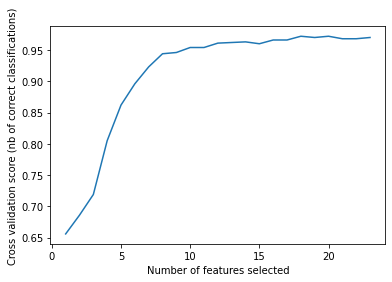

In [ ]:
# recursive feature elimination


from sklearn.svm import SVC

from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=23, n_informative=23,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def balanced_accuracy(cm): # funcion para calcular la "balanced accuracy"
  sensibilidad = cm[1,1]/(cm[1,1]+cm[0,1])
  especificidad = cm[0,0]/(cm[1,0]+cm[0,0])
  return [sensibilidad, especificidad, (sensibilidad + especificidad)/2]

# Definamos la matriz X
campos = ['edad_mujer', 'educacion_mujer', 'educacion_hombre', 'numero_hijos', 'religion_mujer', 'mujer_trabaja', 'nivel_vida', 'exposicion_medios', 'trabajo_1', 'trabajo_2', 'trabajo_3'] # Lista que contiene las features de interés.
X = df1[campos].values # En este caso no hace falta reshapear, porque ya tiene la forma que queremos
y = np.array(df1['Toma_anticonceptivos']) # Nuestra etiqueta sigue siende la misma de antes
X = np.concatenate((X, X**2), axis=1) # agrego features elevados a potencias


X_temp = X
for i in np.arange(2,5):
    X_temp = np.concatenate((X_temp,X**i), axis=1)
X_1 = X_temp


X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3)

scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(X_train) # encuentro los parametros para el escaleo
X_train = scaler.transform(X_train) # aplico la transformacion

scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(X_test) # encuentro los parametros para el escaleo
X_test = scaler.transform(X_test) # aplico la transformacion

regLog_1 = LogisticRegression(penalty = 'l2', class_weight='balanced', max_iter=10000) # Inicializamos nuevamente el modelo
regLog_1.fit(X_train, y_train) # Ajustamos el modelo con los parámetros

score_train = regLog_1.score(X_train,y_train) # Calculamos el score
ypred_train = regLog_1.predict(X_train) # con esto obtengo la predicción de las etiquetas en base a mis datos
cm_train = confusion_matrix(ypred_train, y_train) # primera entrada son las etiquetas predichas, segunda son las reales
metricas_train = balanced_accuracy(cm_train)

print('Para TRAIN set:')
print('El score del modelo es de: {}'.format(round(score_train,4))) # Le pido que printee el score del modelo. Le pido que lo haga con 4 cifras significativas
print('Matriz de confusion del modelo es:')
print(cm_train)
print('Sensibilidad del modelo es de: {}'.format(round(metricas_train[0],4)))
print('Especificidad del modelo es de: {}'.format(round(metricas_train[1],4)))
print('BA del modelo es de: {}'.format(round(metricas_train[2],4)))
print('\n')

score_test= regLog_1.score(X_test,y_test) # Calculamos el score
ypred_test= regLog_1.predict(X_test) # con esto obtengo la predicción de las etiquetas en base a mis datos
cm_test = confusion_matrix(ypred_test, y_test) # primera entrada son las etiquetas predichas, segunda son las reales
metricas_test = balanced_accuracy(cm_test)


print('Para TEST set:')
print('El score del modelo es de: {}'.format(round(score_test,4))) # Le pido que printee el score del modelo. Le pido que lo haga con 4 cifras significativas
print('Matriz de confusion del modelo es:')
print(cm_test)
print('Sensibilidad del modelo es de: {}'.format(round(metricas_test[0],4)))
print('Especificidad del modelo es de: {}'.format(round(metricas_test[1],4)))
print('BA del modelo es de: {}'.format(round(metricas_test[2],4)))

Para TRAIN set:
El score del modelo es de: 0.6715
Matriz de confusion del modelo es:
[[60 34]
 [34 79]]
Sensibilidad del modelo es de: 0.6991
Especificidad del modelo es de: 0.6383
BA del modelo es de: 0.6687


Para TEST set:
El score del modelo es de: 0.7191
Matriz de confusion del modelo es:
[[22 10]
 [15 42]]
Sensibilidad del modelo es de: 0.8077
Especificidad del modelo es de: 0.5946
BA del modelo es de: 0.7011


In [ ]:
def classifier(X,y,n,c):  # X es la matriz de features, y los labels, n-1 la potencia máxima en la que aparecerán los features, C es la constante de regularización

  X_temp = X
  for i in np.arange(2,n):
    X_temp = np.concatenate((X_temp,X**i), axis=1)
  X = X_temp


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
  scaler.fit(X_train) # encuentro los parametros para el escaleo
  X_train = scaler.transform(X_train) # aplico la transformacion

  scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
  scaler.fit(X_test) # encuentro los parametros para el escaleo
  X_test = scaler.transform(X_test) # aplico la transformacion

  regLog = LogisticRegression(penalty='elasticnet' , l1_ratio= 0.5, class_weight='balanced', max_iter=10000,  C=5, solver='saga')
  regLog.fit(X_train, y_train)

  ypred_train = regLog.predict(X_train) # con esto obtengo la predicción de las etiquetas en base a mis datos
  cm_train = confusion_matrix(ypred_train, y_train) # primera entrada son las etiquetas predichas, segunda son las reales
  metricas_train = balanced_accuracy(cm_train)

  ypred_test = regLog.predict(X_test) # con esto obtengo la predicción de las etiquetas en base a mis datos
  cm_test= confusion_matrix(ypred_test, y_test) # primera entrada son las etiquetas predichas, segunda son las reales
  metricas_test = balanced_accuracy(cm_test)

  return metricas_train[2], metricas_test[2]

In [ ]:
campos = ['edad_mujer', 'educacion_mujer', 'educacion_hombre', 'numero_hijos', 'religion_mujer', 'mujer_trabaja', 'nivel_vida', 'exposicion_medios', 'trabajo_1', 'trabajo_2', 'trabajo_3'] # Lista que contiene las features de interés.
X = df1[campos].values # En este caso no hace falta reshapear, porque ya tiene la forma que queremos
y = np.array(df1['Toma_anticonceptivos']) # Nuestra etiqueta sigue siende la misma de antes
X = np.concatenate((X, X**2), axis=1) # agrego features elevados a potencias

n_values = np.arange(1,7) # rango de potencias maximas
c_values = np.arange(0.2,5,0.5) # rango de constantes de regularizacion

iterations = 500 # esto se puede poner en 100 para que no tarde mil años durante la clase

mean_BA_train = np.zeros((len(n_values),len(c_values))) #  los arrays con los balanced accuracy para cada combinacion de hiperparametros, para train y test
mean_BA_test = np.zeros((len(n_values),len(c_values)))

for xx,n in enumerate(n_values): # itero sobre n
    for yy,c in enumerate(c_values): # itero sobre c
      BA_test_temp = [] # variables temporales para ir poniendo los resultados a lo largo de las iteraciones
      BA_train_temp = []
      print([n,c]) # esto es para los ansiosos
      for it in np.arange(iterations): # itero
          BA_train, BA_test = classifier(X,y,n,c)  # calculo las balanced accuracy para esos hiperparametros
          BA_test_temp.append(BA_test) # agrego a las variables temporales
          BA_train_temp.append(BA_train)
      mean_BA_train[xx,yy] = np.mean(BA_train_temp) # calculo promedios
      mean_BA_test[xx,yy] = np.mean(BA_test_temp)


[1, 0.2]
[1, 0.7]
[1, 1.2]
[1, 1.6999999999999997]
[1, 2.1999999999999997]
[1, 2.6999999999999997]
[1, 3.1999999999999997]
[1, 3.6999999999999997]
[1, 4.199999999999999]
[1, 4.699999999999999]
[2, 0.2]
[2, 0.7]
[2, 1.2]
[2, 1.6999999999999997]
[2, 2.1999999999999997]
[2, 2.6999999999999997]
[2, 3.1999999999999997]
[2, 3.6999999999999997]
[2, 4.199999999999999]
[2, 4.699999999999999]
[3, 0.2]
[3, 0.7]
[3, 1.2]
[3, 1.6999999999999997]
[3, 2.1999999999999997]
[3, 2.6999999999999997]
[3, 3.1999999999999997]
[3, 3.6999999999999997]
[3, 4.199999999999999]
[3, 4.699999999999999]
[4, 0.2]
[4, 0.7]
[4, 1.2]
[4, 1.6999999999999997]
[4, 2.1999999999999997]
[4, 2.6999999999999997]
[4, 3.1999999999999997]
[4, 3.6999999999999997]
[4, 4.199999999999999]
[4, 4.699999999999999]
[5, 0.2]
[5, 0.7]
[5, 1.2]
[5, 1.6999999999999997]
[5, 2.1999999999999997]
[5, 2.6999999999999997]
[5, 3.1999999999999997]
[5, 3.6999999999999997]
[5, 4.199999999999999]
[5, 4.699999999999999]
[6, 0.2]
[6, 0.7]
[6, 1.2]
[6, 1.69

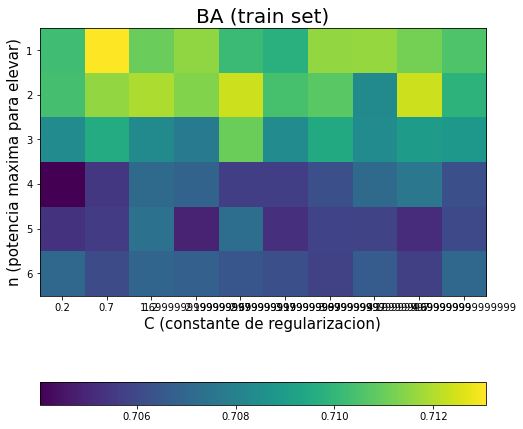

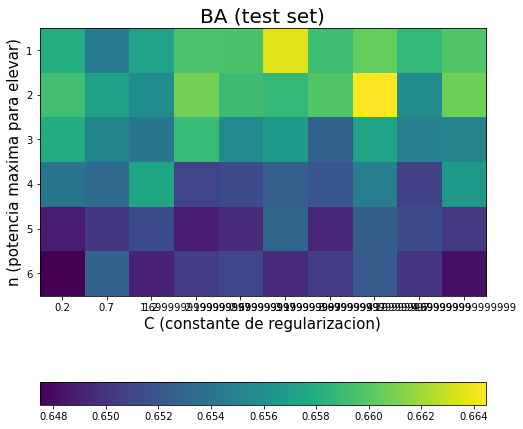

In [ ]:
#grafico de grilla potencias/regularizacion


fig, ax = plt.subplots(1,1, figsize=(8,8))  # visualizacion train set
img = ax.imshow(mean_BA_train) # graficamos la matriz
y_label_list = n_values # estos son los ticks de los ejes
x_label_list = c_values
ax.set_xticks(np.arange(len(c_values))) # creo los ticks de los ejes
ax.set_yticks(np.arange(len(n_values)))
ax.set_yticklabels(y_label_list) # pongo los ticks de los ejes
ax.set_xticklabels(x_label_list)
plt.xlabel('C (constante de regularizacion)', fontsize=15) # le pongo nombre a ejes y titulo
plt.ylabel('n (potencia maxima para elevar)', fontsize=15)
plt.title('BA (train set)', fontsize=20)
fig.colorbar(img, orientation="horizontal", pad=0.2) # la barra de colores donde no me moleste

fig, ax = plt.subplots(1,1, figsize=(8,8)) # visualizacion test set, ver comentarios para el caso train, es idéntico
img = ax.imshow(mean_BA_test)
y_label_list = n_values
x_label_list = c_values
ax.set_xticks(np.arange(len(c_values)))
ax.set_yticks(np.arange(len(n_values)))
ax.set_yticklabels(y_label_list)
ax.set_xticklabels(x_label_list)
plt.xlabel('C (constante de regularizacion)', fontsize=15)
plt.ylabel('n (potencia maxima para elevar)', fontsize=15)
plt.title('BA (test set)', fontsize=20)
fig.colorbar(img, orientation="horizontal", pad=0.2)

In [ ]:
#normalizado, balanceado, regularizado


#standard scaler

In [ ]:
df_test

,Unnamed: 0,edad_mujer,educacion_mujer,educacion_hombre,numero_hijos,religion_mujer,mujer_trabaja,ocupacion_hombre,nivel_vida,exposicion_medios,Toma_anticonceptivos,trabajo_1,trabajo_2,trabajo_3,trabajo_4
0,0,30,2,3,1,1,1,2,1,0,0,0.0,1.0,0.0,0.0
1,1,31,3,4,0,1,0,2,3,0,0,0.0,1.0,0.0,0.0
2,2,23,1,2,3,1,1,3,2,1,0,0.0,0.0,1.0,0.0
3,3,46,1,2,3,1,1,2,1,1,0,0.0,1.0,0.0,0.0
4,4,36,4,4,3,1,1,1,4,0,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,1172,29,3,3,4,1,1,3,4,0,0,0.0,0.0,1.0,0.0
1173,1173,24,3,3,1,1,1,3,2,0,0,0.0,0.0,1.0,0.0
1174,1174,39,1,2,2,1,1,3,1,1,0,0.0,0.0,1.0,0.0
1175,1175,38,1,3,2,1,0,3,3,1,0,0.0,0.0,1.0,0.0


In [ ]:
campos = ['edad_mujer', 'educacion_mujer', 'educacion_hombre', 'numero_hijos', 'religion_mujer', 'mujer_trabaja', 'nivel_vida', 'exposicion_medios', 'trabajo_1', 'trabajo_2', 'trabajo_3']
X_test_final = np.array(df_test[campos])


In [ ]:
X_test_final = np.concatenate((X_test_final, X_test_final**2), axis=1) # agrego features elevados a potencias
type(X_test_final)

numpy.ndarray

In [ ]:
scaler2 = MinMaxScaler() # escaleo por separado ambos sets
scaler2.fit(X_test_final)
X_test_final = scaler.transform(X_test_final)

In [ ]:

X_test_final = np.delete(X_test_final, [4,9,15,20] , 1)
X_test_final.shape



(1177, 18)

In [ ]:
probas = regLog.predict_proba(X_test_final)
print(probas)

[[0.82266014 0.17733986]
 [0.77931678 0.22068322]
 [0.67548822 0.32451178]
 ...
 [0.9479764  0.0520236 ]
 [0.93228254 0.06771746]
 [0.78094431 0.21905569]]


In [ ]:
probas.shape
pd.set_option('display.max_columns', None)

In [ ]:
file_name = 'File_RECORTADO.csv'
np.savetxt(file_name, probas, delimiter=",")
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#kbest

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Definamos la matriz X
campos = ['edad_mujer', 'educacion_mujer', 'educacion_hombre', 'numero_hijos', 'religion_mujer', 'mujer_trabaja', 'nivel_vida', 'exposicion_medios', 'trabajo_1', 'trabajo_2', 'trabajo_3'] # Lista que contiene las features de interés.
X = df1[campos].values # En este caso no hace falta reshapear, porque ya tiene la forma que queremos
y = np.array(df1['Toma_anticonceptivos']) # Nuestra etiqueta sigue siende la misma de antes
X = np.concatenate((X, X**2), axis=1) # agrego features elevados a potencias

Kbest = 18
 # los mejores K que voy a retener

skf = StratifiedKFold(n_splits=5, shuffle=True) # 5 folds es un número típico si tenemos suficientes datos. Pedimos shuffle=True para que sea al azar la separación en subgrupos
skf.get_n_splits(X, y) # arma los folds a partir de los datos

auc_values_fs =  []  # aca es donde van a ir a parar los indices de los features seleccionados en cada fold
selected_features= np.array([]).reshape(0,X.shape[1]) # aca es donde van a ir a parar los AUCs de cada fold. El reshape es para poder concatenar luego.



scaler = MinMaxScaler() # escaleo por separado ambos sets
scaler.fit(X)
X = scaler.transform(X)


selector = SelectKBest(k=Kbest) # por defecto, usa el F score de ANOVA y los Kbest features
selector.fit(X, y) # encuentro los F scores
X_fs = selector.transform(X) # me quedo con los features mejor rankeados en el set de entrenamiento

features = np.array(selector.get_support()).reshape((1,-1)) # esto me pone True si la variable correspondiente fue seleccionada y False sino

selected_features =  np.concatenate((selected_features,features),axis=0)

regLog = LogisticRegression(penalty='elasticnet' , l1_ratio= 0.5, class_weight='balanced', max_iter=10000,  C=3.7, solver='saga' ) # Inicializamos nuevamente el modelo. max_iter es la cantidad de iteraciones maximas del algoritmo de optimizacion de parametros antes de detenerse.
regLog.fit(X_fs, y) # Ajustamos el modelo con los datos de entrenamiento


#probas_test = regLog.predict_proba(X_test_fs)  # probabilidades con datos de evaluación
#fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probas_test[:,1]) # para plotear curva ROC con datos de entrenamiento
#auc_test = roc_auc_score(y_test, probas_test[:,1]) #  AUC con datos de evaluación
#auc_values_fs.append(auc_test)

# print('El AUC promedio es:')
# print(np.mean(auc_values_fs))


# import matplotlib.pyplot as plt

# plt.bar(np.arange(0,X.shape[1]),np.sum(selected_features,axis=0))
# plt.title('Seleccion de features')
# plt.xlabel('Feature')
# plt.ylabel('Folds')

#print(probas_test)


LogisticRegression(C=3.7, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=0.5,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='elasticnet', random_state=None, solver='saga',
                   tol=0.0001, verbose=0, warm_start=False)

In [ ]:
X_test

array([[30.,  2.,  3., ...,  0.,  1.,  0.],
       [31.,  3.,  4., ...,  0.,  1.,  0.],
       [23.,  1.,  2., ...,  0.,  0.,  1.],
       ...,
       [39.,  1.,  2., ...,  0.,  0.,  1.],
       [38.,  1.,  3., ...,  0.,  0.,  1.],
       [29.,  2.,  3., ...,  0.,  0.,  1.]])

In [ ]:
selected_features

array([[1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 0., 1.]])

In [ ]:
4
9
15
20